In [ ]:
# Install RDKit (Colab only)
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 18.7 MB/s eta 0:00:00


In [ ]:
# Optional but useful
!apt install -y python3-rdkit librdkit1 rdkit-data

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-freefont-ttf libcoordgen3 libmaeparser1 python3-numpy
Suggested packages:
  python-numpy-doc python3-pytest rdkit-doc
The following NEW packages will be installed:
  fonts-freefont-ttf libcoordgen3 libmaeparser1 librdkit1 python3-numpy python3-rdkit rdkit-data
0 upgraded, 7 newly installed, 0 to remove and 29 not upgraded.
Need to get 27.1 MB of archives.
After this operation, 129 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-freefont-ttf all 20120503-10build1 [2,388 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcoordgen3 amd64 3.0.0-2 [212 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libmaeparser1 amd64 1.2.4-1build1 [88.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 librdkit1 amd64 202109.2-1build1 [4,191 kB]
Get:

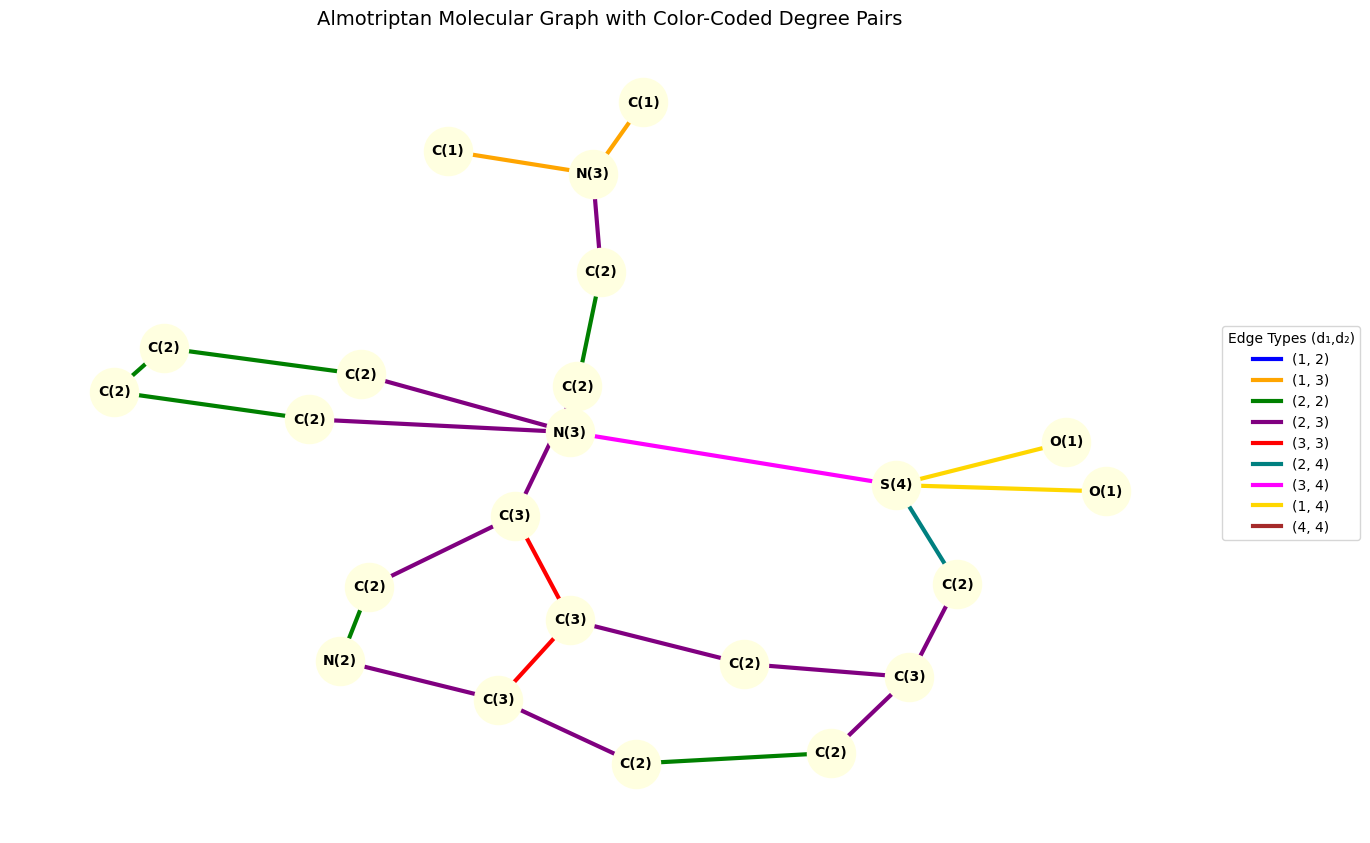

In [ ]:
import os
import networkx as nx
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from matplotlib.lines import Line2D

# Set up output folder
os.makedirs("output_almotriptan", exist_ok=True)

# Correct SMILES for Almotriptan
smiles = "CN(C)CCC1=CNC2=C1C=C(C=C2)CS(=O)(=O)N3CCCC3"
drug_name = "Almotriptan"

# Generate molecule and coordinates
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
AllChem.Compute2DCoords(mol)

# Save 2D structure
Draw.MolToFile(mol, "output_almotriptan/almotriptan_structure.png", size=(600, 400), legend=drug_name)

# Remove hydrogens for graph
mol_no_H = Chem.RemoveHs(mol)

# Create molecular graph
G = nx.Graph()
for atom in mol_no_H.GetAtoms():
    idx = atom.GetIdx()
    symbol = atom.GetSymbol()
    neighbors = [nbr.GetIdx() for nbr in atom.GetNeighbors() if nbr.GetSymbol() != "H"]
    degree = len(neighbors)
    G.add_node(idx, label=f"{symbol}({degree})", degree=degree)

for bond in mol_no_H.GetBonds():
    u, v = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
    G.add_edge(u, v)

# Degree pair → color mapping
color_map = {
    (1, 2): 'blue',
    (1, 3): 'orange',
    (2, 2): 'green',
    (2, 3): 'purple',
    (3, 3): 'red',
    (2, 4): 'teal',
    (3, 4): 'magenta',
    (1, 4): 'gold',
    (4, 4): 'brown'
}

# Determine edge colors
edge_colors = []
for u, v in G.edges():
    d1, d2 = G.nodes[u]['degree'], G.nodes[v]['degree']
    pair = tuple(sorted((d1, d2)))
    edge_colors.append(color_map.get(pair, 'gray'))

# Draw graph with labeled nodes and colored edges
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 8))
nx.draw(
    G, pos,
    labels=nx.get_node_attributes(G, 'label'),
    with_labels=True,
    node_color='lightyellow',
    edge_color=edge_colors,
    node_size=1200,
    font_size=10,
    font_weight='bold',
    width=3
)

# Edge legend
legend_elements = [Line2D([0], [0], color=color, lw=3, label=str(pair)) for pair, color in color_map.items()]
plt.subplots_adjust(right=0.75)
plt.legend(
    handles=legend_elements,
    title="Edge Types (d₁,d₂)",
    loc='center left',
    bbox_to_anchor=(1.01, 0.5),
    borderaxespad=0.
)

plt.title("Almotriptan Molecular Graph with Color-Coded Degree Pairs", fontsize=14)
plt.axis('off')
plt.savefig("output_almotriptan/Almotriptan_graph_colored.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import os
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from rdkit import Chem
from rdkit.Chem import Draw, AllChem

# Output folder
output_dir = "output_belzutifan"
os.makedirs(output_dir, exist_ok=True)

# Belzutifan SMILES
smiles = "CS(=O)(=O)C1=C2[C@@H]([C@@H]([C@@H](C2=C(C=C1)OC3=CC(=CC(=C3)C#N)F)F)F)O"
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
AllChem.Compute2DCoords(mol)

# Save chemical structure as PNG
Draw.MolToFile(mol, os.path.join(output_dir, "belzutifan_structure.png"), size=(600, 400), legend="Belzutifan")

# Build molecular graph without hydrogens
mol_no_H = Chem.RemoveHs(mol)
G = nx.Graph()

for atom in mol_no_H.GetAtoms():
    idx = atom.GetIdx()
    degree = len([n for n in atom.GetNeighbors() if n.GetSymbol() != 'H'])
    G.add_node(idx, label=f"{atom.GetSymbol()}({degree})", degree=degree)

for bond in mol_no_H.GetBonds():
    G.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())

# Color by edge type
color_map = {
    (1, 2): 'blue',
    (1, 3): 'orange',
    (2, 2): 'green',
    (2, 3): 'purple',
    (3, 3): 'red',
    (2, 4): 'teal',
    (3, 4): 'magenta',
    (1, 4): 'gold',
    (4, 4): 'brown'
}

edge_colors = []
for u, v in G.edges():
    deg_u = G.nodes[u]['degree']
    deg_v = G.nodes[v]['degree']
    pair = tuple(sorted((deg_u, deg_v)))
    edge_colors.append(color_map.get(pair, 'gray'))

# Plot graph
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 8))
nx.draw(
    G, pos,
    labels=nx.get_node_attributes(G, 'label'),
    with_labels=True,
    edge_color=edge_colors,
    node_color='lightyellow',
    node_size=1200,
    font_size=10,
    font_weight='bold',
    width=3
)

# Add legend
legend = [Line2D([0], [0], color=color, lw=3, label=str(k)) for k, color in color_map.items()]
plt.legend(handles=legend, title="Edge Types (d₁,d₂)", loc='center left', bbox_to_anchor=(1.01, 0.5))
plt.title("Belzutifan Molecular Graph with Color-Coded Degree Pairs")
plt.axis('off')

# Save graph to file
graph_path = os.path.join(output_dir, "belzutifan_graph_colored.png")
plt.savefig(graph_path, dpi=300, bbox_inches='tight')
plt.close()

print(f"✅ Structure saved to: {os.path.join(output_dir, 'belzutifan_structure.png')}")
print(f"✅ Graph saved to: {graph_path}")


✅ Structure saved to: output_belzutifan/belzutifan_structure.png
✅ Graph saved to: output_belzutifan/belzutifan_graph_colored.png


In [ ]:
import os
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from rdkit import Chem
from rdkit.Chem import Draw, AllChem

# Output directory
output_dir = "output_carmustine"
os.makedirs(output_dir, exist_ok=True)

# Carmustine SMILES
smiles = "C(CCl)NC(=O)N(CCCl)N=O"
drug_name = "Carmustine"

# Generate RDKit molecule
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
AllChem.Compute2DCoords(mol)

# Save chemical structure
Draw.MolToFile(mol, os.path.join(output_dir, "carmustine_structure.png"), size=(600, 400), legend=drug_name)

# Remove hydrogens for graph
mol_no_H = Chem.RemoveHs(mol)
G = nx.Graph()

# Add nodes with degree info
for atom in mol_no_H.GetAtoms():
    idx = atom.GetIdx()
    degree = len([n for n in atom.GetNeighbors() if n.GetSymbol() != "H"])
    G.add_node(idx, label=f"{atom.GetSymbol()}({degree})", degree=degree)

# Add edges
for bond in mol_no_H.GetBonds():
    G.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())

# Edge color by degree pair
color_map = {
    (1, 2): 'blue',
    (1, 3): 'orange',
    (1, 4): 'gold',
    (2, 2): 'green',
    (2, 3): 'purple',
    (2, 4): 'teal',
    (3, 3): 'red',
    (3, 4): 'magenta',
    (4, 4): 'brown'
}
edge_colors = []
for u, v in G.edges():
    du, dv = G.nodes[u]['degree'], G.nodes[v]['degree']
    pair = tuple(sorted((du, dv)))
    edge_colors.append(color_map.get(pair, 'gray'))

# Draw graph
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 8))
nx.draw(
    G, pos,
    labels=nx.get_node_attributes(G, 'label'),
    with_labels=True,
    edge_color=edge_colors,
    node_color='lightyellow',
    node_size=1200,
    font_size=10,
    font_weight='bold',
    width=3
)

# Add legend
legend = [Line2D([0], [0], color=color, lw=3, label=str(k)) for k, color in color_map.items()]
plt.legend(handles=legend, title="Edge Types (d₁,d₂)", loc='center left', bbox_to_anchor=(1.01, 0.5))
plt.title("Carmustine Molecular Graph with Color-Coded Degree Pairs")
plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "carmustine_graph_colored.png"), dpi=300, bbox_inches='tight')
plt.close()

output_dir


<ipython-input-6-2f29415b62b9>:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


'output_carmustine'

In [ ]:
import os
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from rdkit import Chem
from rdkit.Chem import Draw, AllChem

# Output directory
output_dir = "output_eletriptan"
os.makedirs(output_dir, exist_ok=True)

# Eletriptan SMILES
smiles = "CN1CCC[C@@H]1CC2=CNC3=C2C=C(C=C3)CCS(=O)(=O)C4=CC=CC=C4"
drug_name = "Eletriptan"

# Generate RDKit molecule
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
AllChem.Compute2DCoords(mol)

# Save chemical structure
structure_path = os.path.join(output_dir, "eletriptan_structure.png")
Draw.MolToFile(mol, structure_path, size=(600, 400), legend=drug_name)

# Remove hydrogens for graph
mol_no_H = Chem.RemoveHs(mol)
G = nx.Graph()

# Add nodes with degree info
for atom in mol_no_H.GetAtoms():
    idx = atom.GetIdx()
    degree = len([n for n in atom.GetNeighbors() if n.GetSymbol() != "H"])
    G.add_node(idx, label=f"{atom.GetSymbol()}({degree})", degree=degree)

# Add edges
for bond in mol_no_H.GetBonds():
    G.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())

# Edge color by degree pair
color_map = {
    (1, 2): 'blue',
    (1, 3): 'orange',
    (1, 4): 'gold',
    (2, 2): 'green',
    (2, 3): 'purple',
    (2, 4): 'teal',
    (3, 3): 'red',
    (3, 4): 'magenta',
    (4, 4): 'brown'
}
edge_colors = []
for u, v in G.edges():
    du, dv = G.nodes[u]['degree'], G.nodes[v]['degree']
    pair = tuple(sorted((du, dv)))
    edge_colors.append(color_map.get(pair, 'gray'))

# Draw molecular graph
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 8))
nx.draw(
    G, pos,
    labels=nx.get_node_attributes(G, 'label'),
    with_labels=True,
    edge_color=edge_colors,
    node_color='lightyellow',
    node_size=1200,
    font_size=10,
    font_weight='bold',
    width=3
)

# Legend
legend = [Line2D([0], [0], color=color, lw=3, label=f"{k}")
          for k, color in color_map.items()]
plt.legend(handles=legend, title="Edge Types (d₁,d₂)", loc='center left', bbox_to_anchor=(1.01, 0.5))
plt.title("Eletriptan Molecular Graph (Colored by Degree Pair)")
plt.axis('off')
plt.tight_layout()

# Save graph
graph_path = os.path.join(output_dir, "eletriptan_graph_colored.png")
plt.savefig(graph_path, dpi=300, bbox_inches='tight')
plt.close()

structure_path, graph_path


<ipython-input-7-e1e71d11c10a>:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


('output_eletriptan/eletriptan_structure.png',
 'output_eletriptan/eletriptan_graph_colored.png')

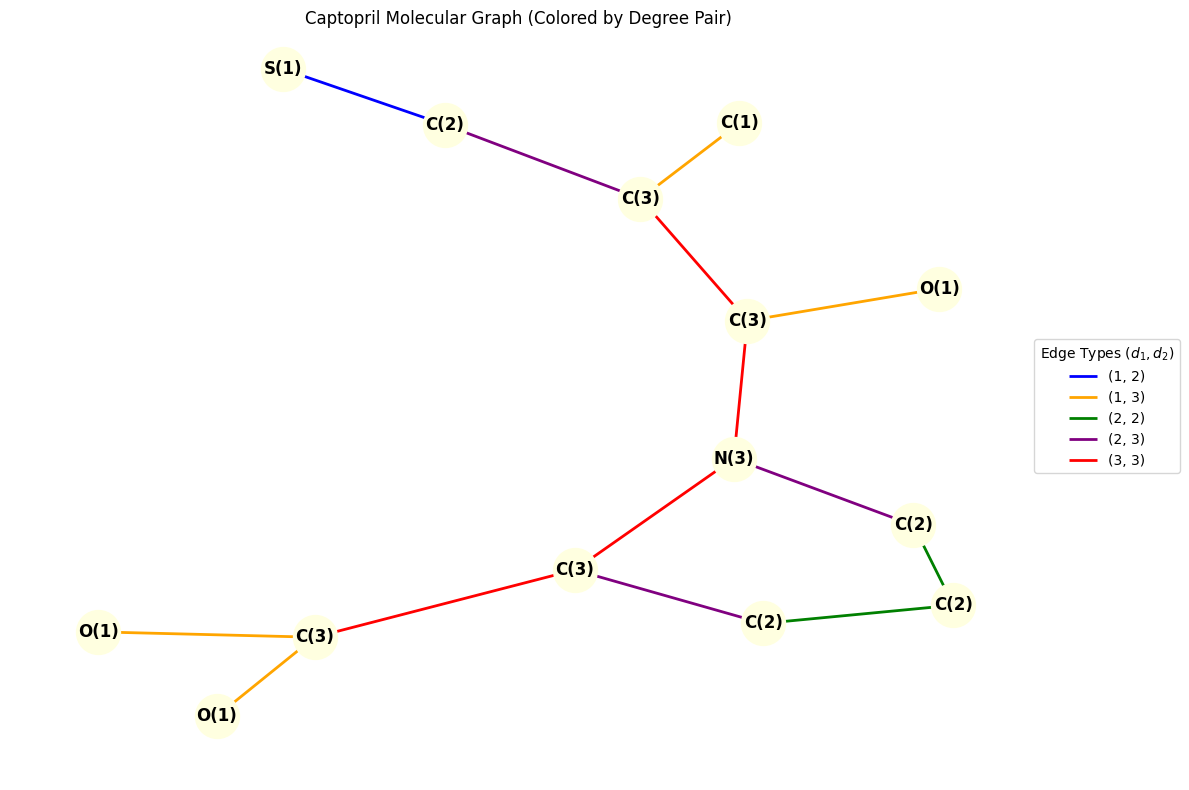

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
import networkx as nx
import matplotlib.pyplot as plt

# SMILES for Captopril
smiles = "C[C@H](CS)C(=O)N1CCC[C@H]1C(=O)O"
mol = Chem.MolFromSmiles(smiles)
AllChem.Compute2DCoords(mol)

# Save 2D chemical structure
Draw.MolToFile(mol, "captopril_structure.png", size=(600, 400), legend="Captopril")

# Build molecular graph (excluding hydrogens)
G = nx.Graph()
for atom in mol.GetAtoms():
    if atom.GetSymbol() != 'H':
        idx = atom.GetIdx()
        symbol = atom.GetSymbol()
        degree = atom.GetDegree()
        G.add_node(idx, label=f"{symbol}({degree})", degree=degree)

for bond in mol.GetBonds():
    u, v = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
    if mol.GetAtomWithIdx(u).GetSymbol() != 'H' and mol.GetAtomWithIdx(v).GetSymbol() != 'H':
        G.add_edge(u, v)

# Define color mapping for edge types
edge_colors = {
    (1, 2): 'blue',
    (1, 3): 'orange',
    (1, 4): 'gold',
    (2, 2): 'green',
    (2, 3): 'purple',
    (2, 4): 'teal',
    (3, 3): 'red',
    (3, 4): 'magenta',
    (4, 4): 'brown'
}

# Collect edges by type
colored_edges = {k: [] for k in edge_colors}
for u, v in G.edges():
    d1 = G.nodes[u]['degree']
    d2 = G.nodes[v]['degree']
    key = tuple(sorted((d1, d2)))
    if key in colored_edges:
        colored_edges[key].append((u, v))

# Draw molecular graph with color-coded edges
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 8))
for key, edges in colored_edges.items():
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=edge_colors[key], width=2, label=f"{key}")

nx.draw_networkx_nodes(G, pos, node_color='lightyellow', node_size=1000)
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_weight='bold')

plt.title("Captopril Molecular Graph (Colored by Degree Pair)")
plt.legend(title="Edge Types $(d_1,d_2)$", loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('off')
plt.tight_layout()
plt.savefig("captopril_graph_colored.png", dpi=300)
plt.show()


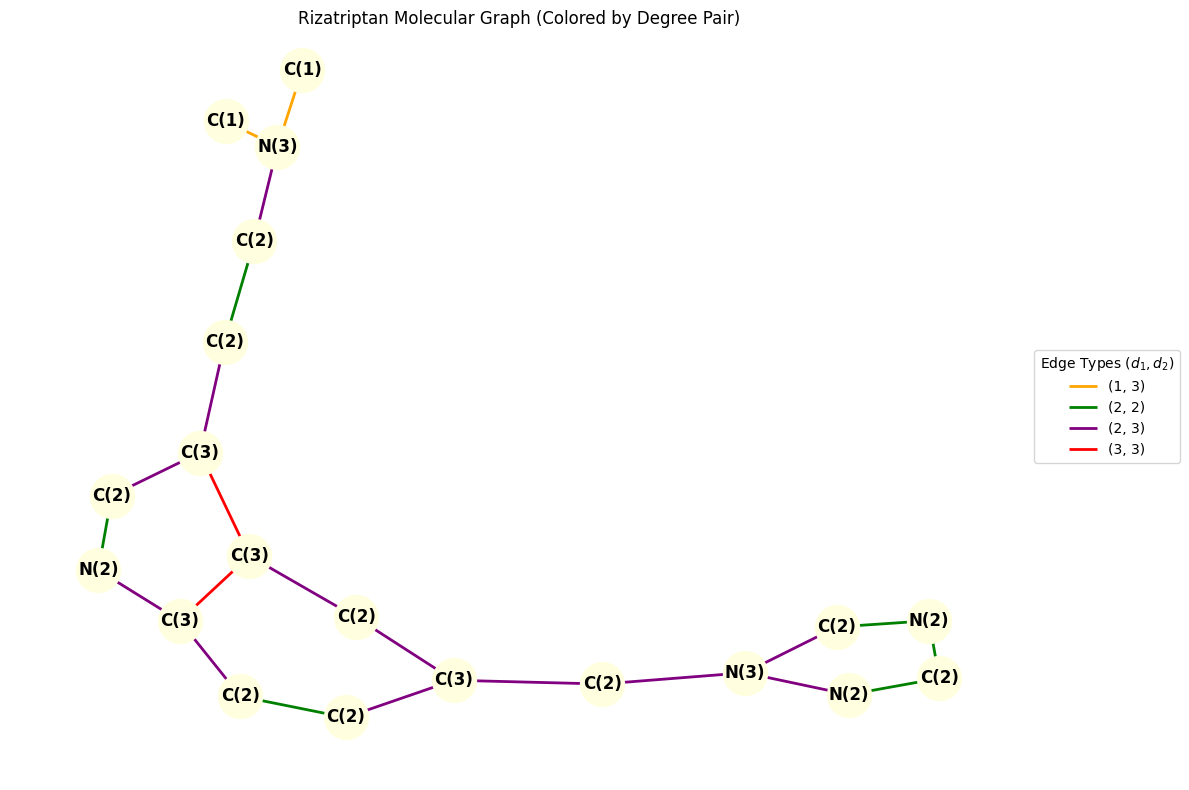

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
import networkx as nx
import matplotlib.pyplot as plt

# SMILES for Rizatriptan
smiles = "CN(C)CCC1=CNC2=C1C=C(C=C2)CN3C=NC=N3"
mol = Chem.MolFromSmiles(smiles)
AllChem.Compute2DCoords(mol)

# Save 2D chemical structure
Draw.MolToFile(mol, "rizatriptan_structure.png", size=(600, 400), legend="Rizatriptan")

# Build molecular graph (excluding hydrogens)
G = nx.Graph()
for atom in mol.GetAtoms():
    if atom.GetSymbol() != 'H':
        idx = atom.GetIdx()
        symbol = atom.GetSymbol()
        degree = atom.GetDegree()
        G.add_node(idx, label=f"{symbol}({degree})", degree=degree)

for bond in mol.GetBonds():
    u, v = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
    if mol.GetAtomWithIdx(u).GetSymbol() != 'H' and mol.GetAtomWithIdx(v).GetSymbol() != 'H':
        G.add_edge(u, v)

# Define color mapping for edge types
edge_colors = {
    (1, 2): 'blue',
    (1, 3): 'orange',
    (1, 4): 'gold',
    (2, 2): 'green',
    (2, 3): 'purple',
    (2, 4): 'teal',
    (3, 3): 'red',
    (3, 4): 'magenta',
    (4, 4): 'brown'
}

# Collect edges by type
colored_edges = {k: [] for k in edge_colors}
for u, v in G.edges():
    d1 = G.nodes[u]['degree']
    d2 = G.nodes[v]['degree']
    key = tuple(sorted((d1, d2)))
    if key in colored_edges:
        colored_edges[key].append((u, v))

# Draw molecular graph with color-coded edges
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 8))
for key, edges in colored_edges.items():
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=edge_colors[key], width=2, label=f"{key}")

nx.draw_networkx_nodes(G, pos, node_color='lightyellow', node_size=1000)
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_weight='bold')

plt.title("Rizatriptan Molecular Graph (Colored by Degree Pair)")
plt.legend(title="Edge Types $(d_1,d_2)$", loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('off')
plt.tight_layout()
plt.savefig("rizatriptan_graph_colored.png", dpi=300)
plt.show()


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
import networkx as nx

# SMILES string for Sumatriptan
smiles = "CNS(=O)(=O)CC1=CC2=C(C=C1)NC=C2CCN(C)C"

# Generate RDKit molecule
mol = Chem.MolFromSmiles(smiles)
AllChem.Compute2DCoords(mol)

# Draw chemical structure
drawer = rdMolDraw2D.MolDraw2DCairo(600, 400)
drawer.DrawMolecule(mol)
drawer.FinishDrawing()
structure_bytes = drawer.GetDrawingText()
with open("sumatriptan_structure.png", "wb") as f:
    f.write(structure_bytes)

# Create molecular graph
G = nx.Graph()
for atom in mol.GetAtoms():
    idx = atom.GetIdx()
    symbol = atom.GetSymbol()
    degree = atom.GetDegree()
    G.add_node(idx, label=f"{symbol}({degree})", degree=degree)

for bond in mol.GetBonds():
    u = bond.GetBeginAtomIdx()
    v = bond.GetEndAtomIdx()
    G.add_edge(u, v)

# Edge color mapping by degree pair
edge_colors = {
    (1, 2): 'blue',
    (1, 3): 'orange',
    (1, 4): 'gold',
    (2, 2): 'green',
    (2, 3): 'purple',
    (2, 4): 'teal',
    (3, 3): 'red',
    (3, 4): 'magenta',
    (4, 4): 'brown'
}

colored_edges = {k: [] for k in edge_colors}
for u, v in G.edges():
    d1 = G.nodes[u]['degree']
    d2 = G.nodes[v]['degree']
    key = tuple(sorted((d1, d2)))
    if key in edge_colors:
        colored_edges[key].append((u, v))

# Draw molecular graph
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 8))
for key, edges in colored_edges.items():
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=edge_colors[key], width=2, label=f"{key}")

nx.draw_networkx_nodes(G, pos, node_color='lightyellow', node_size=900)
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_size=10, font_weight='bold')

plt.title("Sumatriptan Molecular Graph (Colored by Degree Pair)", fontsize=14)
plt.axis('off')
plt.legend(title="Edge Types $(d_1,d_2)$", loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
colored_graph_path = "sumatriptan_graph_colored.png"
plt.savefig(colored_graph_path, dpi=300)
plt.close()

"sumatriptan_structure.png", "sumatriptan_graph_colored.png"


('sumatriptan_structure.png', 'sumatriptan_graph_colored.png')

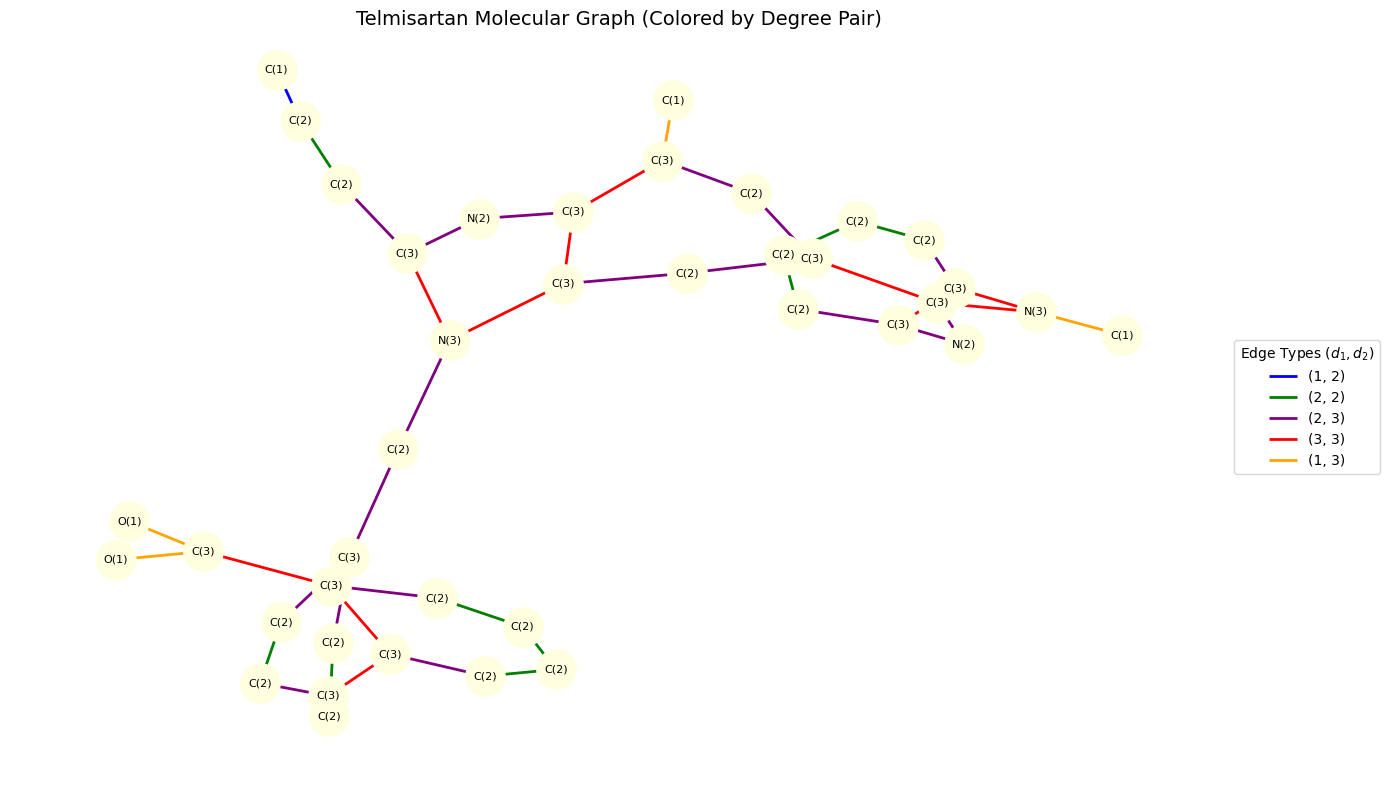

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
import matplotlib.pyplot as plt
import networkx as nx

# SMILES for Telmisartan
smiles = "CCCC1=NC2=C(N1CC3=CC=C(C=C3)C4=CC=CC=C4C(=O)O)C=C(C=C2C)C5=NC6=CC=CC=C6N5C"
mol = Chem.MolFromSmiles(smiles)
rdDepictor.Compute2DCoords(mol)

# Save 2D structure image (no .encode needed)
drawer = rdMolDraw2D.MolDraw2DCairo(600, 400)
drawer.DrawMolecule(mol)
drawer.FinishDrawing()
with open("telmisartan_structure.png", "wb") as f:
    f.write(drawer.GetDrawingText())

# Build molecular graph (excluding hydrogens)
G = nx.Graph()
for atom in mol.GetAtoms():
    idx = atom.GetIdx()
    symbol = atom.GetSymbol()
    degree = atom.GetDegree()
    G.add_node(idx, label=f"{symbol}({degree})", degree=degree)

for bond in mol.GetBonds():
    u = bond.GetBeginAtomIdx()
    v = bond.GetEndAtomIdx()
    G.add_edge(u, v)

# Color map for degree pairs
edge_colors = {
    (1, 2): "blue",
    (1, 3): "orange",
    (1, 4): "gold",
    (2, 2): "green",
    (2, 3): "purple",
    (2, 4): "teal",
    (3, 3): "red",
    (3, 4): "magenta",
    (4, 4): "brown"
}

# Assign color-coded edges
colored_edges = {}
for u, v in G.edges():
    du, dv = G.nodes[u]['degree'], G.nodes[v]['degree']
    key = tuple(sorted((du, dv)))
    if key not in colored_edges:
        colored_edges[key] = []
    colored_edges[key].append((u, v))

# Plot the molecular graph
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(14, 8))
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_size=8)
nx.draw_networkx_nodes(G, pos, node_color='lightyellow', node_size=800)

# Draw each edge type with a different color
for etype, elist in colored_edges.items():
    color = edge_colors.get(etype, "gray")
    nx.draw_networkx_edges(G, pos, edgelist=elist, edge_color=color, width=2, label=str(etype))

plt.title("Telmisartan Molecular Graph (Colored by Degree Pair)", fontsize=14)
plt.axis('off')
plt.legend(title="Edge Types $(d_1,d_2)$", loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("telmisartan_graph_colored.png", dpi=300)
plt.show()


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
import networkx as nx
import matplotlib.pyplot as plt

# SMILES string for Zolmitriptan
smiles = "CN(C)CCC1=CNC2=C1C=C(C=C2)C[C@H]3COC(=O)N3"

# Generate RDKit molecule
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)

# Compute 2D coordinates
from rdkit.Chem import AllChem
AllChem.Compute2DCoords(mol)

# Draw structure
drawer = rdMolDraw2D.MolDraw2DCairo(400, 300)
drawer.DrawMolecule(mol)
drawer.FinishDrawing()
structure_bytes = drawer.GetDrawingText()
structure_path = "zolmitriptan_structure.png"
with open(structure_path, "wb") as f:
    f.write(structure_bytes)

# Build molecular graph
G = nx.Graph()
for atom in mol.GetAtoms():
    idx = atom.GetIdx()
    G.add_node(idx, label=f"{atom.GetSymbol()}({atom.GetDegree()})", degree=atom.GetDegree())

for bond in mol.GetBonds():
    a1 = bond.GetBeginAtomIdx()
    a2 = bond.GetEndAtomIdx()
    d1 = G.nodes[a1]['degree']
    d2 = G.nodes[a2]['degree']
    G.add_edge(a1, a2, deg_pair=tuple(sorted((d1, d2))))

# Color edges by degree pair
edge_colors = {
    (1, 2): 'blue',
    (1, 3): 'orange',
    (1, 4): 'gold',
    (2, 2): 'green',
    (2, 3): 'purple',
    (2, 4): 'teal',
    (3, 3): 'red',
    (3, 4): 'magenta',
    (4, 4): 'brown'
}
colors = [edge_colors.get(G[u][v]['deg_pair'], 'gray') for u, v in G.edges()]

# Position and draw the molecular graph
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(14, 8))
nx.draw_networkx_nodes(G, pos, node_color='lightyellow')
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'))
nx.draw_networkx_edges(G, pos, edge_color=colors)

# Create legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color=color, lw=3, label=f"{k}")
    for k, color in edge_colors.items()
]
plt.legend(handles=legend_elements, title="Edge Types $(d_1,d_2)$", loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Zolmitriptan Molecular Graph (Colored by Degree Pair)")
plt.axis('off')
graph_path = "zolmitriptan_graph_colored.png"
plt.savefig(graph_path, bbox_inches="tight", dpi=300)
plt.close()

structure_path, graph_path


('zolmitriptan_structure.png', 'zolmitriptan_graph_colored.png')

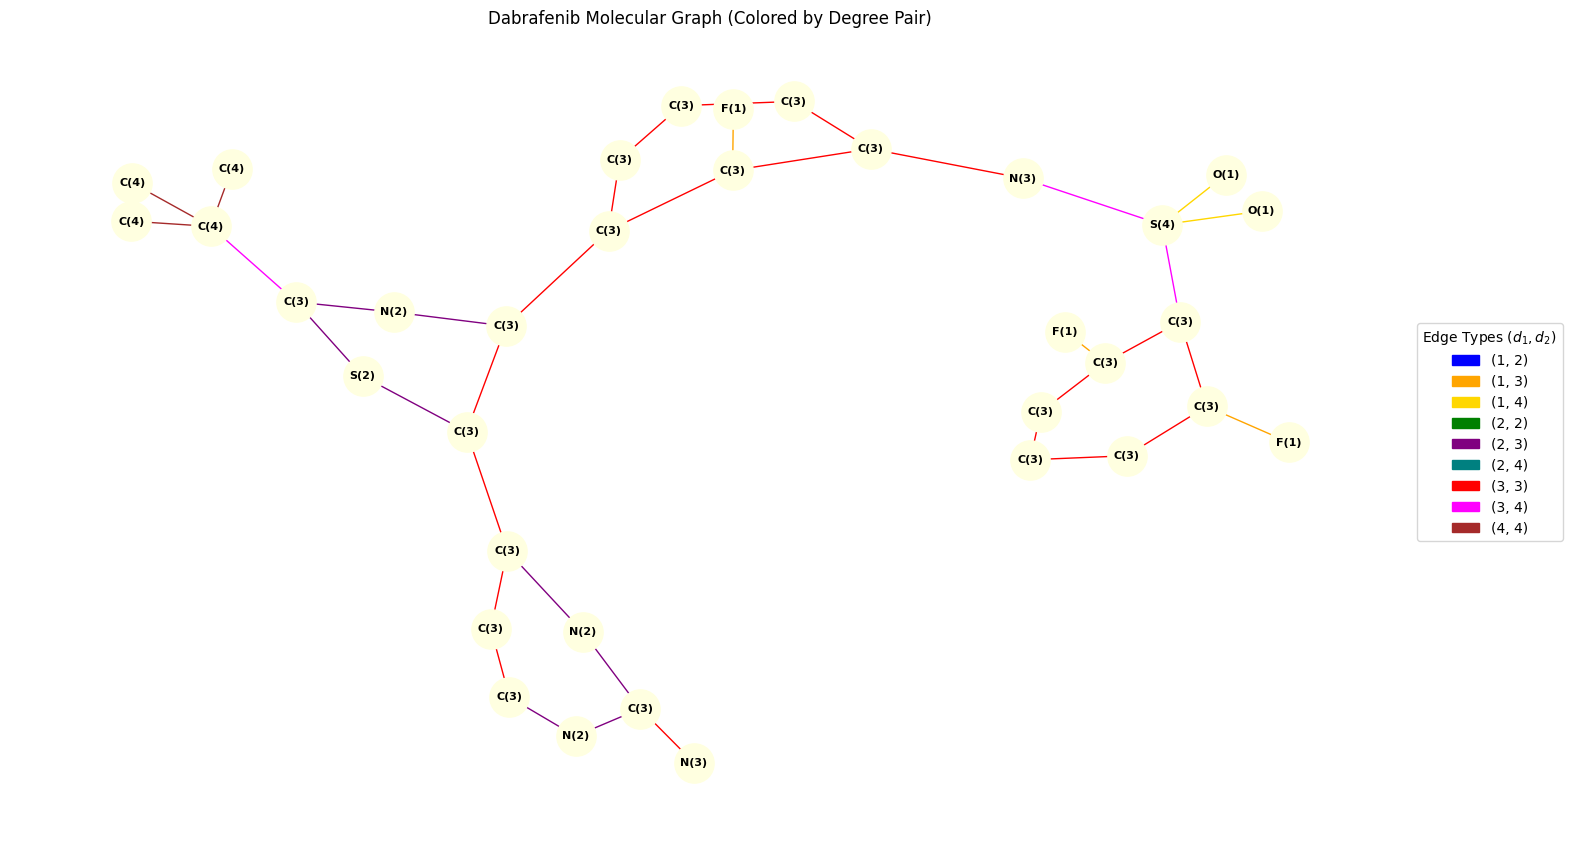

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
import networkx as nx
import matplotlib.pyplot as plt

# SMILES for Dabrafenib
smiles = "CC(C)(C)C1=NC(=C(S1)C2=NC(=NC=C2)N)C3=C(C(=CC=C3)NS(=O)(=O)C4=C(C=CC=C4F)F)F"

mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
Chem.Kekulize(mol, clearAromaticFlags=True)

# Structure
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
rdDepictor.Compute2DCoords(mol)
drawer = rdMolDraw2D.MolDraw2DCairo(400, 300)
drawer.DrawMolecule(mol)
drawer.FinishDrawing()
with open("dabrafenib_structure.png", "wb") as f:
    f.write(drawer.GetDrawingText())

# Graph
G = nx.Graph()
for atom in mol.GetAtoms():
    if atom.GetSymbol() != 'H':
        G.add_node(atom.GetIdx(), label=f"{atom.GetSymbol()}({atom.GetDegree()})", degree=atom.GetDegree())

for bond in mol.GetBonds():
    u, v = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
    if mol.GetAtomWithIdx(u).GetSymbol() != 'H' and mol.GetAtomWithIdx(v).GetSymbol() != 'H':
        G.add_edge(u, v)

# Edge coloring
colors = {(1,2): "blue", (1,3): "orange", (1,4): "gold", (2,2): "green",
          (2,3): "purple", (2,4): "teal", (3,3): "red", (3,4): "magenta", (4,4): "brown"}

edge_colors = []
for u, v in G.edges():
    d1, d2 = G.nodes[u]['degree'], G.nodes[v]['degree']
    edge_colors.append(colors.get(tuple(sorted((d1, d2))), "gray"))

# Plot
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(14, 8))
nx.draw(G, pos,
        labels=nx.get_node_attributes(G, 'label'),
        with_labels=True,
        node_color='lightyellow',
        edge_color=edge_colors,
        node_size=800,
        font_size=8,
        font_weight='bold')

# Legend
import matplotlib.patches as mpatches
legend_elements = [mpatches.Patch(color=c, label=str(k)) for k, c in colors.items()]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), title="Edge Types $(d_1,d_2)$")
plt.title("Dabrafenib Molecular Graph (Colored by Degree Pair)")
plt.axis('off')
plt.savefig("dabrafenib_graph_colored.png", bbox_inches="tight")
plt.show()


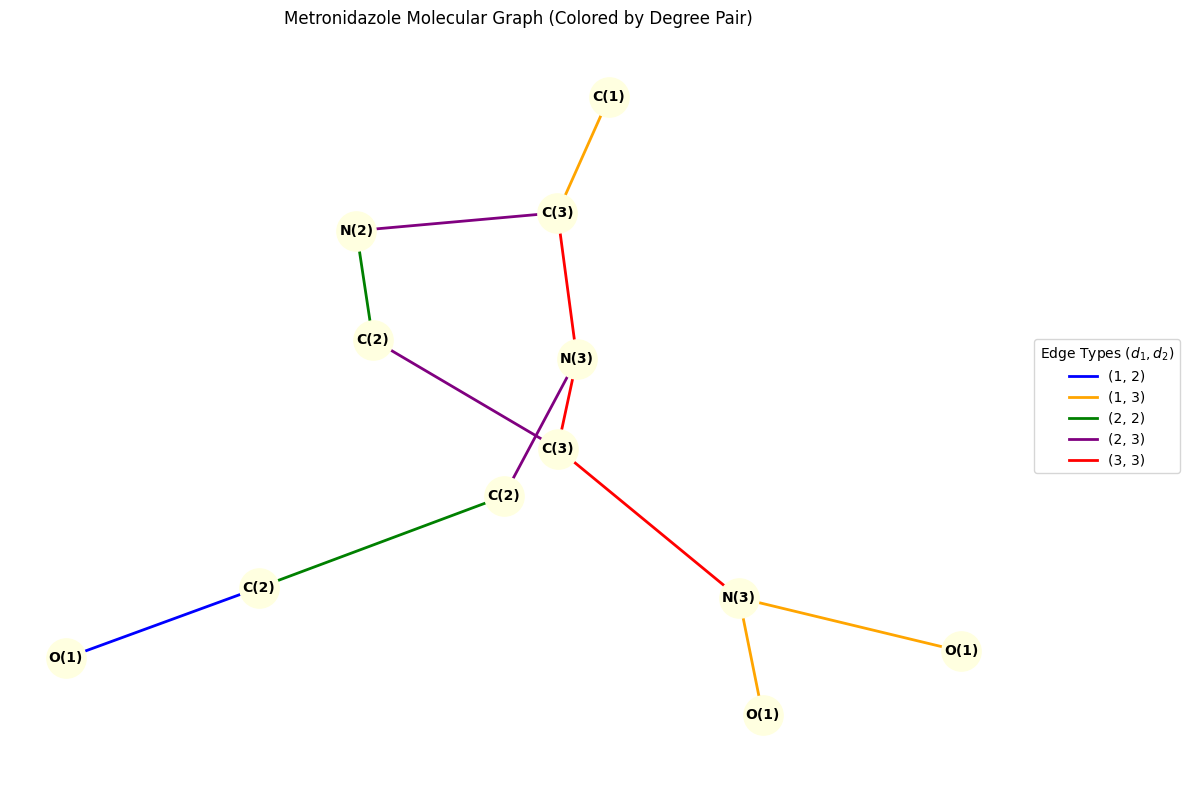

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import networkx as nx

# Define the SMILES string for Metronidazole
smiles = "CC1=NC=C(N1CCO)[N+](=O)[O-]"
mol = Chem.MolFromSmiles(smiles)

# Generate 2D coordinates
from rdkit.Chem import AllChem
AllChem.Compute2DCoords(mol)

# Save chemical structure
drawer = Draw.MolDraw2DCairo(400, 300)
drawer.DrawMolecule(mol)
drawer.FinishDrawing()
structure_bytes = drawer.GetDrawingText()
with open("metronidazole_structure.png", "wb") as f:
    f.write(structure_bytes)

# Create molecular graph using NetworkX
G = nx.Graph()
for atom in mol.GetAtoms():
    idx = atom.GetIdx()
    symbol = atom.GetSymbol()
    degree = atom.GetDegree()
    G.add_node(idx, label=f"{symbol}({degree})", symbol=symbol, degree=degree)

for bond in mol.GetBonds():
    u = bond.GetBeginAtomIdx()
    v = bond.GetEndAtomIdx()
    G.add_edge(u, v)

# Define edge colors by degree pair
edge_colors = {
    (1, 2): "blue",
    (1, 3): "orange",
    (1, 4): "gold",
    (2, 2): "green",
    (2, 3): "purple",
    (2, 4): "teal",
    (3, 3): "red",
    (3, 4): "magenta",
    (4, 4): "brown",
}

# Build edge list for each color
colored_edges = {k: [] for k in edge_colors}
for u, v in G.edges():
    d1 = G.nodes[u]["degree"]
    d2 = G.nodes[v]["degree"]
    pair = tuple(sorted((d1, d2)))
    if pair in edge_colors:
        colored_edges[pair].append((u, v))

# Plot the graph
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color='lightyellow', node_size=800)
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_size=10, font_weight='bold')

# Draw each group of edges in its color
for pair, edges in colored_edges.items():
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=edge_colors[pair], width=2, label=str(pair))

# Create legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=color, lw=2, label=f"{pair}")
                   for pair, color in edge_colors.items() if colored_edges[pair]]
plt.legend(handles=legend_elements, title="Edge Types $(d_1,d_2)$", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Metronidazole Molecular Graph (Colored by Degree Pair)")
plt.axis('off')
plt.tight_layout()
plt.savefig("metronidazole_graph_colored.png", dpi=300)
plt.show()


<ipython-input-17-204058b6d821>:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


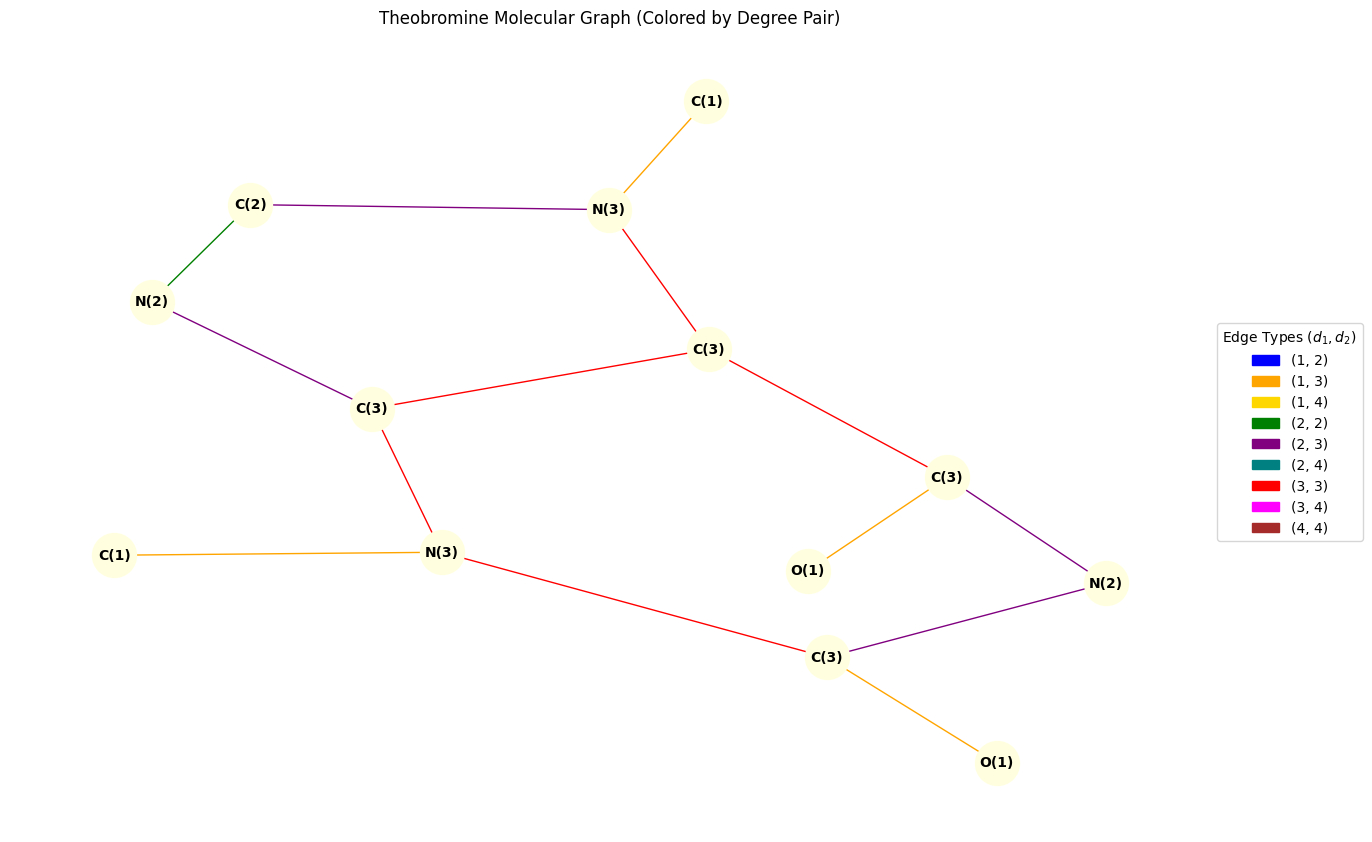

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
import networkx as nx
import matplotlib.pyplot as plt

# SMILES for Theobromine
smiles = "CN1C=NC2=C1C(=O)NC(=O)N2C"
mol = Chem.MolFromSmiles(smiles)
rdDepictor.Compute2DCoords(mol)

# Draw chemical structure
drawer = rdMolDraw2D.MolDraw2DCairo(400, 300)
drawer.DrawMolecule(mol)
drawer.FinishDrawing()
structure_bytes = drawer.GetDrawingText()
with open("theobromine_structure.png", "wb") as f:
    f.write(structure_bytes)

# Construct molecular graph
G = nx.Graph()
for atom in mol.GetAtoms():
    idx = atom.GetIdx()
    symbol = atom.GetSymbol()
    degree = atom.GetDegree()
    G.add_node(idx, label=f"{symbol}({degree})", degree=degree)

for bond in mol.GetBonds():
    u = bond.GetBeginAtomIdx()
    v = bond.GetEndAtomIdx()
    G.add_edge(u, v)

# Define edge color mapping by degree pair
color_map = {
    (1, 2): "blue",
    (1, 3): "orange",
    (1, 4): "gold",
    (2, 2): "green",
    (2, 3): "purple",
    (2, 4): "teal",
    (3, 3): "red",
    (3, 4): "magenta",
    (4, 4): "brown",
}
edge_colors = []
edge_labels = {}

for u, v in G.edges():
    d1 = G.nodes[u]['degree']
    d2 = G.nodes[v]['degree']
    key = tuple(sorted((d1, d2)))
    edge_colors.append(color_map.get(key, "gray"))
    edge_labels[(u, v)] = f"({d1},{d2})"

# Plot graph
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 8))
nx.draw(
    G, pos,
    labels=nx.get_node_attributes(G, 'label'),
    with_labels=True,
    node_color='lightyellow',
    edge_color=edge_colors,
    node_size=1000,
    font_size=10,
    font_weight='bold'
)

# Legend
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=color, label=f"{pair}") for pair, color in color_map.items()]
plt.legend(handles=legend_handles, title="Edge Types $(d_1,d_2)$", loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Theobromine Molecular Graph (Colored by Degree Pair)")
plt.axis('off')
plt.tight_layout()
plt.savefig("theobromine_graph_colored.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd

# Create the data dictionary based on the LaTeX table
data = {
    "Drug": [
        "Almotriptan", "Belzutifan", "Carmustine", "Eletriptan", "Captopril",
        "Rizatriptan", "Sumatriptan", "Telmisartan", "Zolmitriptan",
        "Dabrafenib", "Metronidazole", "Theobromine"
    ],
    "Disease": [
        "Migraine", "Brain", "Brain", "Migraine", "Kidney",
        "Migraine", "Migraine", "Kidney", "Migraine",
        "Brain", "Kidney", "Kidney"
    ],
    "TPSA": [
        64.8, 95.8, 61.8, 61.6, 58.6, 49.7, 73.6, 72.9, 57.4, 147.0, 83.9, 67.2
    ],
    "R1": [
        118.0, 140.0, 48.0, 123.0, 74.0, 109.0, 83.0, 118.0, 264.0, 251.0, 55.0, 79.0
    ],
    "M1": [
        102.0, 117.0, 44.0, 97.0, 60.0, 90.0, 75.0, 101.0, 222.0, 177.0, 60.0, 66.0
    ],
    "ReZG3": [
        562.0, 766.0, 230.0, 678.0, 434.0, 650.0, 518.0, 684.0, 1586.0, 1530.0, 333.0, 474.0
    ],
    "N": [
        46.1400, 51.6488, 20.8570, 45.2878, 35.5922, 44.6917, 39.0902, 51.0012, 95.9863,
        73.7927, 22.9334, 40.4270
    ],
    "IN1": [
        22.5700, 22.2036, 13.4380, 19.6482, 15.8104, 19.5743, 18.4147, 21.8098, 42.1727,
        27.2693, 11.7337, 18.4620
    ],
    "IN2": [
        24.4700, 24.3490, 12.9390, 22.3356, 17.4006, 22.2099, 21.0662, 24.0963, 43.2339,
        35.9041, 13.0882, 20.5190
    ],
    "GQ": [
        25.3200, 21.6182, 10.9440, 18.4591, 14.6444, 19.3132, 16.2192, 19.0657, 37.5704,
        30.0652, 12.3504, 18.4550
    ],
    "QG": [
        25.6600, 18.4123, 10.6000, 24.0107, 20.3377, 23.7147, 15.0846, 23.7036, 36.7083,
        23.3529, 16.4777, 21.2120
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
csv_path = "topological_indices_drugs.csv"
df.to_csv(csv_path, index=False)

csv_path


'topological_indices_drugs.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the correct dataset
df = pd.read_csv("topological_indices_drugs.csv")

# Define the numeric features (topological indices)
# Correct the feature names to match the dataset
features_corrected = ['R1', 'M1', 'ReZG3', 'N', 'IN1', 'IN2', 'GQ', 'QG']

# Extract and impute missing values if any
X_raw = df[features_corrected]
imputer = SimpleImputer(strategy="mean")
X_imputed = pd.DataFrame(imputer.fit_transform(X_raw), columns=features_corrected)

# Normalize the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=features_corrected)

# Plot raw feature distributions
plt.figure(figsize=(12, 6))
sns.violinplot(data=X_imputed, inner="point")
plt.title("Raw Feature Distributions After Mean Imputation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("violin_raw_features.png")
plt.close()

# Plot normalized feature distributions
plt.figure(figsize=(12, 6))
sns.violinplot(data=X_scaled, inner="point")
plt.title("Normalized Feature Distributions After Standard Scaling")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("violin_normalized_features.png")
plt.close()

"violin_raw_features.png", "violin_normalized_features.png"


('violin_raw_features.png', 'violin_normalized_features.png')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the updated dataset
df = pd.read_csv("topological_indices_drugs.csv")

# Define topological descriptors with LaTeX-style labels
latex_feature_names = {
    "$\\mathcal{R}_1$": "R1",
    "$\\mathcal{M}_1$": "M1",
    "$\\mathcal{R}e\\mathcal{ZG}_3$": "ReZG3",
    "$\\mathcal{N}$": "N",
    "$\\mathcal{IN}_1$": "IN1",
    "$\\mathcal{IN}_2$": "IN2",
    "$\\mathcal{GQ}$": "GQ",
    "$\\mathcal{QG}$": "QG"
}

# Prepare feature matrix and target
X_full = df[[v for v in latex_feature_names.values()]]
y = df["TPSA"]

# Track results
results = []

# Train-test split
X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y, test_size=0.3, random_state=42)

# Loop through each feature independently
for latex_name, col in latex_feature_names.items():
    X_train = X_train_full[[col]]
    X_test = X_test_full[[col]]
    model = LinearRegression().fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    intercept = model.intercept_
    slope = model.coef_[0]

    results.append({
        "Feature": latex_name,
        "R2": r2,
        "MAE": mae,
        "RMSE_Test": rmse_test,
        "RMSE_Train": rmse_train,
        "Intercept": intercept,
        "Slope": slope,
        "Equation": f"\\text{{TPSA}} = {intercept:.3f} + {slope:.3f} \\cdot {latex_name}"
    })

results_df = pd.DataFrame(results).sort_values(by="MAE")

# Plot comparison of MAE and RMSE for sorted features
fig, ax = plt.subplots(figsize=(10, 5))
x_labels = results_df["Feature"]
ax.plot(x_labels, results_df["MAE"], label="MAE", marker="o")
ax.plot(x_labels, results_df["RMSE_Test"], label="Test RMSE", marker="o")
ax.plot(x_labels, results_df["RMSE_Train"], label="Train RMSE", marker="x")
ax.set_ylabel("Error")
ax.set_title("MAE and RMSE (Train/Test) per Feature")
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("univariate_lr_errors_latex.png")
plt.close()

#import ace_tools as tools; tools.display_dataframe_to_user(name="Univariate Linear Regression Results", dataframe=results_df)

"univariate_lr_errors_latex.png"


'univariate_lr_errors_latex.png'

In [ ]:
# Display column names to debug feature mismatch
df = pd.read_csv("topological_indices_drugs.csv")
df.columns.tolist()


['Drug', 'Disease', 'TPSA', 'R1', 'M1', 'ReZG3', 'N', 'IN1', 'IN2', 'GQ', 'QG']

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
<ipython-input-26-323afd7dbcc5>:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wi

('TPSA = 64.644 + 127.202·R1 - 49.287·M1 - 144.625·ReZG3 + 99.428·N - 31.521·IN1 + 27.995·IN2 - 1.467·GQ - 27.911·QG',
 4.9681567217881266e-14,
 54.65496486819206)

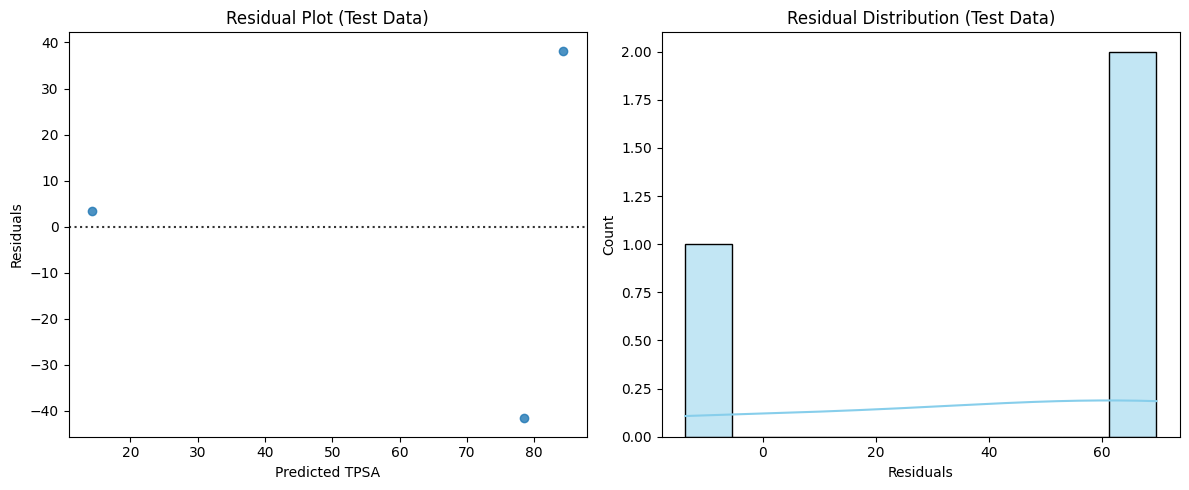

In [ ]:
# Update feature names to match actual column names in the dataset
features_actual = ['R1', 'M1', 'ReZG3', 'N', 'IN1', 'IN2', 'GQ', 'QG']
X = df[features_actual]
y = df["TPSA"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features_actual)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.25, random_state=42)

# Fit model using statsmodels to get p-values
X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const).fit()

# Prediction and evaluation
X_test_const = sm.add_constant(X_test)
y_pred_train = ols_model.predict(X_train_const)
y_pred_test = ols_model.predict(X_test_const)

rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))
rmse_test = np.sqrt(np.mean((y_pred_test - y_test)**2))

# Plot residuals and distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Residual plot
sns.residplot(x=y_pred_test, y=y_test - y_pred_test, ax=axes[0])
axes[0].set_title("Residual Plot (Test Data)")
axes[0].set_xlabel("Predicted TPSA")
axes[0].set_ylabel("Residuals")

# Histogram of residuals
sns.histplot(y_test - y_pred_test, kde=True, ax=axes[1], bins=10, color='skyblue')
axes[1].set_title("Residual Distribution (Test Data)")
axes[1].set_xlabel("Residuals")

plt.tight_layout()
plt.savefig("mlr_normalized_residuals.png")

# Extract regression equation and p-values
coef_table = ols_model.summary2().tables[1].copy()
coef_table.reset_index(inplace=True)
coef_table.columns = ['Variable', 'Coefficient', 'StdErr', 't', 'P>|t|', '[0.025', '0.975]']
equation = f"TPSA = {ols_model.params[0]:.3f}"
for name, coef in ols_model.params.items():
    if name != 'const':
        sign = '+' if coef >= 0 else '-'
        equation += f" {sign} {abs(coef):.3f}·{name}"

coef_table["Equation"] = [equation if i == 0 else "" for i in range(len(coef_table))]
coef_table["RMSE_Train"] = rmse_train
coef_table["RMSE_Test"] = rmse_test

#import ace_tools as tools; tools.display_dataframe_to_user(name="MLR Coefficients and P-Values (Normalized Data)", dataframe=coef_table)
coef_table
equation, rmse_train, rmse_test


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("topological_indices_drugs.csv")

# Extract features and target
X = df.drop(columns=["Drug", "Disease", "TPSA"])
y = df["TPSA"]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Define alpha ranges
alpha_ranges = {
    "Low Alpha": np.logspace(-2, 1, 100),
    "Mid Alpha": np.logspace(-2, 2, 100),
    "High Alpha": np.linspace(1000, 2000, 100)
}

performance_summary = []
rmse_traces = {}

# Fit ElasticNet for each range
for label, alphas in alpha_ranges.items():
    model = ElasticNetCV(alphas=alphas, cv=5, l1_ratio=0.5, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    performance_summary.append({
        "Alpha Range": label,
        "Best Alpha": model.alpha_,
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Intercept": model.intercept_,
        "Non-zero Features": np.sum(model.coef_ != 0)
    })

    rmse_traces[label] = {
        "alphas": model.alphas_,
        "rmse": model.mse_path_.mean(axis=1) ** 0.5
    }

# Plotting RMSE vs Alpha
plt.figure(figsize=(10, 6))
for label, trace in rmse_traces.items():
    plt.plot(trace["alphas"], trace["rmse"], label=label)
    min_idx = np.argmin(trace["rmse"])
    min_alpha = trace["alphas"][min_idx]
    min_rmse = trace["rmse"][min_idx]
    plt.scatter(min_alpha, min_rmse, label=f"Min RMSE ({label})", marker='o')

plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("ElasticNet RMSE vs Alpha (Normalized Data)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("en_rmse_alpha_comparison_normalized.png")
plt.close()

performance_df = pd.DataFrame(performance_summary)
#import ace_tools as tools; tools.display_dataframe_to_user(name="ElasticNet Performance Summary", dataframe=performance_df)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 4.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 9, number of used features: 0
[LightGBM] [Info] Start training from score 66.511111
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

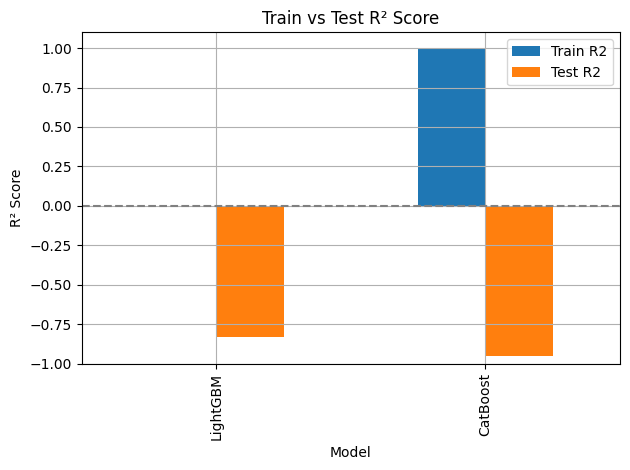

In [ ]:
# Install required packages (if using locally or in Colab)
!pip install lightgbm catboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import log
import lightgbm as lgb
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("topological_indices_drugs.csv")

# Extract features and target
X = df.drop(columns=["Drug", "Disease", "TPSA"])
y = df["TPSA"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=min(len(X.columns), 8))
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    n = len(y_test)
    k = X_test.shape[1]

    metrics = {
        "Model": name,
        "Train R2": r2_score(y_train, y_train_pred),
        "Test R2": r2_score(y_test, y_test_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "MAE": mean_absolute_error(y_test, y_test_pred),
        "AIC": n * log(mean_squared_error(y_test, y_test_pred)) + 2 * k,
        "BIC": n * log(mean_squared_error(y_test, y_test_pred)) + k * log(n)
    }

    return metrics

# Fit LightGBM
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_results = evaluate_model("LightGBM", lgb_model, X_train, X_test, y_train, y_test)

# Fit CatBoost
catboost_model = CatBoostRegressor(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)
catboost_results = evaluate_model("CatBoost", catboost_model, X_train, X_test, y_train, y_test)

# Display results
results_df = pd.DataFrame([lgb_results, catboost_results])
print(results_df)

# Optional: Plot R2 scores
results_df.set_index("Model")[["Train R2", "Test R2"]].plot(kind="bar", ylim=(-1, 1.1), title="Train vs Test R² Score")
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("R² Score")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from rdkit import Chem
from rdkit.Chem import Crippen
import pandas as pd

# Define drugs and their SMILES strings
drug_smiles = {
    "Almotriptan": "CCN(CC)CCOc1ccc(cc1)CN2c3ccccc3CC2=O",
    "Belzutifan": "Cc1ccc(cc1NC(=O)C2(CN(C2)C(=O)Nc3ccc(F)c(C(F)(F)F)c3)C#N)C(F)(F)F",
    "Carmustine": "CN(CCCl)CC(=O)N(CCCl)C(=O)N",
    "Eletriptan": "CCN(CC)CCOc1cc2ncnc(N3CCC(CC3)c4ccccc4)c2cc1",
    "Captopril": "CC(C(=O)O)C(CC1=CC=CS1)C(=O)N",
    "Rizatriptan": "CN(CC1=CC=CC=C1)CCC2=CNC3=CC=CC=C32",
    "Sumatriptan": "CN(C)CCCN1c2ccccc2CC1CC(=O)N",
    "Telmisartan": "CC1=CC(=CC=C1C2=NC3=CC=CC=C3C(=O)N2CC4=CC=C(C=C4)C5=NC6=CC=CC=C6C(=O)N5)C(C)C",
    "Zolmitriptan": "CN(C)CCCN1c2ccccc2CC1C(=O)N",
    "Dabrafenib": "CC(C)(C)NC1=NC2=C(N1)C=CC(=C2)NC3=NC(=CC=C3)C4=CC(=C(C=C4)OC)Cl",
    "Metronidazole": "CN1C=NC=N1CCO",
    "Theobromine": "Cn1cnc2c1c(=O)n(c(=O)n2C)C"
}

# Create a DataFrame
logp_data = []

for drug, smiles in drug_smiles.items():
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        logp = Crippen.MolLogP(mol)
        logp_data.append({"Drug": drug, "LogP": round(logp, 4)})
    else:
        logp_data.append({"Drug": drug, "LogP": "Invalid SMILES"})

df_logp = pd.DataFrame(logp_data)

# Save to CSV
df_logp.to_csv("logp_values.csv", index=False)

# Display
print(df_logp)


             Drug            LogP
0     Almotriptan          3.4965
1      Belzutifan          5.1679
2      Carmustine          0.3031
3      Eletriptan          4.7344
4       Captopril          1.1128
5     Rizatriptan          3.8424
6     Sumatriptan          1.2448
7     Telmisartan          6.4471
8    Zolmitriptan          0.8547
9      Dabrafenib          6.2409
10  Metronidazole  Invalid SMILES
11    Theobromine         -1.0293


[23:31:29] Explicit valence for atom # 5 N, 4, is greater than permitted


In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Crippen

# Drug names and SMILES strings
data = {
    "Drug": [
        "Almotriptan", "Belzutifan", "Carmustine", "Eletriptan", "Captopril",
        "Rizatriptan", "Sumatriptan", "Telmisartan", "Zolmitriptan",
        "Dabrafenib", "Metronidazole", "Theobromine"
    ],
    "SMILES": [
        "CN(C)CCC1=CNC2=C1C=C(C=C2)CS(=O)(=O)N3CCCC3",
        "CS(=O)(=O)C1=C2[C@@H]([C@@H]([C@@H](C2=C(C=C1)OC3=CC(=CC(=C3)C#N)F)F)F)O",
        "C(CCl)NC(=O)N(CCCl)N=O",
        "CN1CCC[C@@H]1CC2=CNC3=C2C=C(C=C3)CCS(=O)(=O)C4=CC=CC=C4",
        "C[C@H](CS)C(=O)N1CCC[C@H]1C(=O)O",
        "CN(C)CCC1=CNC2=C1C=C(C=C2)CN3C=NC=N3",
        "CNS(=O)(=O)CC1=CC2=C(C=C1)NC=C2CCN(C)C",
        "CCCC1=NC2=C(N1CC3=CC=C(C=C3)C4=CC=CC=C4C(=O)O)C=C(C=C2C)C5=NC6=CC=CC=C6N5C",
        "CN(C)CCC1=CNC2=C1C=C(C=C2)C[C@H]3COC(=O)N3",
        "CC(C)(C)C1=NC(=C(S1)C2=NC(=NC=C2)N)C3=C(C(=CC=C3)NS(=O)(=O)C4=C(C=CC=C4F)F)F",
        "CC1=NC=C(N1CCO)[N+](=O)[O-]",
        "CN1C=NC2=C1C(=O)NC(=O)N2C"
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Compute LogP using RDKit
logp_values = []
for smile in df["SMILES"]:
    mol = Chem.MolFromSmiles(smile)
    logp = Crippen.MolLogP(mol) if mol else None
    logp_values.append(logp)

df["LogP"] = logp_values
df.to_csv("logp_values.csv", index=False)
print(df)


             Drug                                             SMILES     LogP
0     Almotriptan        CN(C)CCC1=CNC2=C1C=C(C=C2)CS(=O)(=O)N3CCCC3  2.19760
1      Belzutifan  CS(=O)(=O)C1=C2[C@@H]([C@@H]([C@@H](C2=C(C=C1)...  3.28888
2      Carmustine                             C(CCl)NC(=O)N(CCCl)N=O  1.15700
3      Eletriptan  CN1CCC[C@@H]1CC2=CNC3=C2C=C(C=C3)CCS(=O)(=O)C4...  3.82100
4       Captopril                   C[C@H](CS)C(=O)N1CCC[C@H]1C(=O)O  0.62790
5     Rizatriptan               CN(C)CCC1=CNC2=C1C=C(C=C2)CN3C=NC=N3  1.91180
6     Sumatriptan             CNS(=O)(=O)CC1=CC2=C(C=C1)NC=C2CCN(C)C  1.32120
7     Telmisartan  CCCC1=NC2=C(N1CC3=CC=C(C=C3)C4=CC=CC=C4C(=O)O)...  7.26442
8    Zolmitriptan         CN(C)CCC1=CNC2=C1C=C(C=C2)C[C@H]3COC(=O)N3  1.92290
9      Dabrafenib  CC(C)(C)C1=NC(=C(S1)C2=NC(=NC=C2)N)C3=C(C(=CC=...  5.36490
10  Metronidazole                        CC1=NC=C(N1CCO)[N+](=O)[O-]  0.09202
11    Theobromine                          CN1C=NC2=C1C(=O)NC(=O

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the updated dataset
file_path = "topological_indices_with_new_logp.csv"
df = pd.read_csv(file_path)

# Separate features and target (LogP)
X = df.drop(columns=["Drug", "Disease", "LogP"])
y = df["LogP"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # retain 95% variance
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Apply SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_train_pred = svr_model.predict(X_train)
y_test_pred = svr_model.predict(X_test)

# Evaluation
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train, r2_test, rmse_train, rmse_test, mae_test


(0.43773906288813724,
 0.04092782278028617,
 1.764541225369178,
 1.85722132538716,
 1.298728953599744)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
df = pd.read_csv("topological_indices_with_new_logp.csv")

# Prepare features and target
X = df.drop(columns=["Drug","Disease", "LogP"])
y = df["LogP"]



In [ ]:
pip install --upgrade scikit-learn


In [ ]:
# Redefine ensemble models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
ensemble = VotingRegressor(estimators=[("rf", rf), ("gb", gb)])

# Normalize and reduce dimension
X_scaled = scaler.fit_transform(X)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)

# Fit ensemble model
ensemble.fit(X_train, y_train)
y_pred_train = ensemble.predict(X_train)
y_pred_test = ensemble.predict(X_test)

# Compute metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train, r2_test, mae_test, rmse_test


(0.9628480656690193,
 0.6517903638002427,
 1.1961210458869647,
 1.2788148134687471)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np


